# Install and import dependencies

In [2]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [4]:
#Gym stuff
import gym
import gym_anytrading

#Stable_baselines
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

#Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\leilaa\AppData\Roaming\Python\Python37\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# Bring in MArketWatch GME data
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=08/20/2018&endDate=08/20/2021

In [20]:
df = pd.read_csv('gmedata.csv')

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume
0,08/20/2021,153.80,160.09,153.24,159.30,"1,154,858"
1,08/19/2021,156.77,157.99,150.78,152.90,"1,196,548"
2,08/18/2021,163.25,165.60,156.75,157.05,"1,411,842"
3,08/17/2021,161.19,169.48,161.10,163.55,"1,215,938"
4,08/16/2021,161.00,169.88,159.16,163.93,"1,574,877"


In [22]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [24]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-20,153.80,160.09,153.24,159.30,"1,154,858"
2021-08-19,156.77,157.99,150.78,152.90,"1,196,548"
2021-08-18,163.25,165.60,156.75,157.05,"1,411,842"
2021-08-17,161.19,169.48,161.10,163.55,"1,215,938"
2021-08-16,161.00,169.88,159.16,163.93,"1,574,877"


In [35]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
# to set how portion of data we are gonna include in our algorithm, here we included the first 100 timesteps and are starting from the 10 top timesteps
# The first argument of frame_bound should be equal or more than window_size  5>=5

In [36]:
# To look at the environment
env.prices

array([159.3 , 152.9 , 157.05, 163.55, 163.93, 162.52, 162.35, 158.78,
       159.05, 161.13, 151.77, 153.44, 146.8 , 152.75, 157.65, 161.12,
       164.86, 169.12, 178.54, 183.94, 180.36, 178.85, 185.81, 191.18,
       173.49, 169.04, 166.82, 167.62, 180.06, 189.25, 191.23, 191.38,
       190.66, 199.56, 202.83, 204.36, 214.14, 210.88, 213.25, 209.51,
       212.31, 219.34, 220.4 , 200.37, 213.82, 223.59, 222.97, 222.5 ,
       229.44, 233.34, 220.39, 302.56, 300.  , 280.01, 248.36, 258.18,
       282.24, 249.02, 222.  , 254.13, 242.56, 209.43, 180.01, 176.79,
       170.49, 168.83, 180.67, 180.6 , 159.92, 164.5 , 144.79, 146.92,
       143.22, 161.11, 161.01, 159.48, 160.73, 162.2 , 173.59, 176.19,
       178.58, 177.77, 168.93, 151.18, 151.17, 158.51, 158.53, 164.37,
       154.69, 156.44, 166.53, 140.99, 141.09, 158.36, 170.26, 177.97,
       184.5 , 186.95, 191.45, 189.82])

In [37]:
env.signal_features
# [Price , change in price from the previews timwstep]

array([[ 1.5930e+02,  0.0000e+00],
       [ 1.5290e+02, -6.4000e+00],
       [ 1.5705e+02,  4.1500e+00],
       [ 1.6355e+02,  6.5000e+00],
       [ 1.6393e+02,  3.8000e-01],
       [ 1.6252e+02, -1.4100e+00],
       [ 1.6235e+02, -1.7000e-01],
       [ 1.5878e+02, -3.5700e+00],
       [ 1.5905e+02,  2.7000e-01],
       [ 1.6113e+02,  2.0800e+00],
       [ 1.5177e+02, -9.3600e+00],
       [ 1.5344e+02,  1.6700e+00],
       [ 1.4680e+02, -6.6400e+00],
       [ 1.5275e+02,  5.9500e+00],
       [ 1.5765e+02,  4.9000e+00],
       [ 1.6112e+02,  3.4700e+00],
       [ 1.6486e+02,  3.7400e+00],
       [ 1.6912e+02,  4.2600e+00],
       [ 1.7854e+02,  9.4200e+00],
       [ 1.8394e+02,  5.4000e+00],
       [ 1.8036e+02, -3.5800e+00],
       [ 1.7885e+02, -1.5100e+00],
       [ 1.8581e+02,  6.9600e+00],
       [ 1.9118e+02,  5.3700e+00],
       [ 1.7349e+02, -1.7690e+01],
       [ 1.6904e+02, -4.4500e+00],
       [ 1.6682e+02, -2.2200e+00],
       [ 1.6762e+02,  8.0000e-01],
       [ 1.8006e+02,

# Build Environment

In [47]:
env.action_space
# We have 2 diferent action: Buy and Sale

Discrete(2)

Info: {'total_reward': 81.36999999999998, 'total_profit': 1.0168901088140923, 'position': 1}


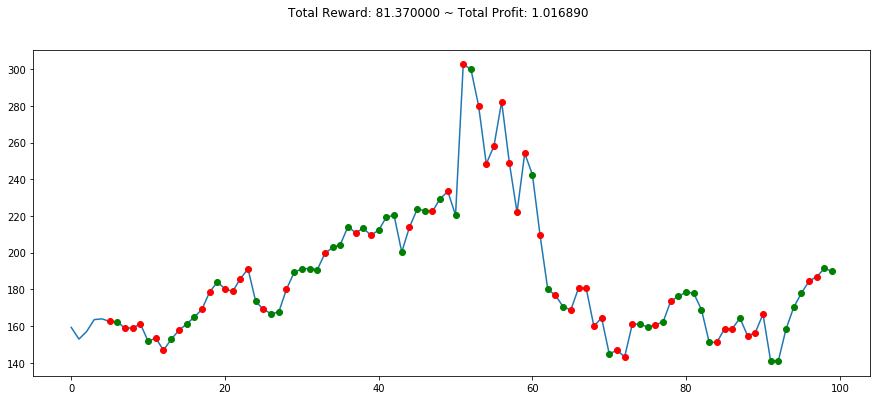

In [43]:
state = env.reset()
score = 0
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print('Info:', info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Build Environment and Train

In [50]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [55]:
model = A2C('MlpLstmPolicy', env=env, verbose=1)
model.learn(total_timesteps=3000)

---------------------------------
| explained_variance | -0.239   |
| fps                | 18       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 50.7     |
---------------------------------
---------------------------------
| explained_variance | -89.6    |
| fps                | 350      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.000226 |
---------------------------------
---------------------------------
| explained_variance | -945     |
| fps                | 404      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.000512 |
---------------------------------
---------------------------------
| explained_variance | -37.6    |
| fps                | 427      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

# Evaluation

In [57]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]              #reshape the observation To be able to work with non-vectorized environment
    action, _state =  model.predict(obs)
    obs, reward, done, info = env.step(action)
    if done:
        print('Info:', info)
        break

Info: {'total_reward': 21.360000000000014, 'total_profit': 1.053219494518457, 'position': 1}


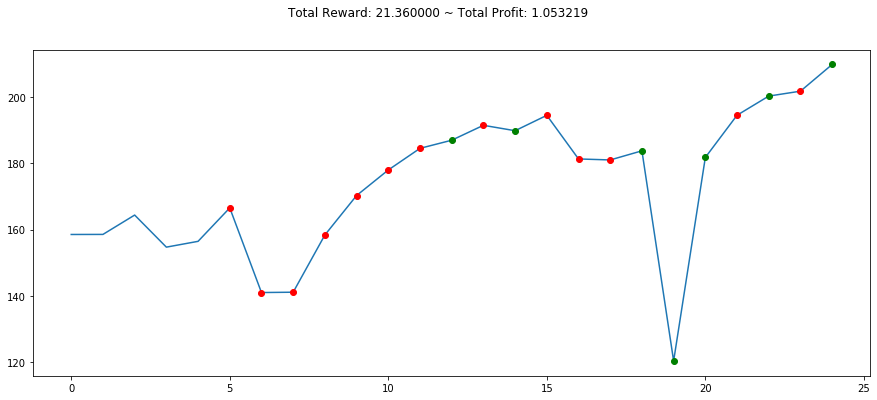

In [58]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()